# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
sales_train = pd.read_csv("/Users/apple/Desktop/ADM/assignment2/sales_train.csv")
sales_test = pd.read_csv("/Users/apple/Desktop/ADM/assignment2/test.csv")
shops = pd.read_csv("/Users/apple/Desktop/ADM/assignment2/shops.csv")
items = pd.read_csv("/Users/apple/Desktop/ADM/assignment2/items.csv")
item_categories = pd.read_csv("/Users/apple/Desktop/ADM/assignment2/item_categories.csv")

In [3]:
print("shape of train:", sales_train.shape)
print("shape of test:", sales_test.shape)
print("shape of shops:", shops.shape)
print("shape of items:", items.shape)
print("shape of item_categories:", item_categories.shape)

shape of train: (2935849, 6)
shape of test: (214200, 3)
shape of shops: (60, 2)
shape of items: (22170, 3)
shape of item_categories: (84, 2)


In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
sales_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
len(np.unique(sales_train['shop_id']))

60

In [10]:
len(np.unique(sales_train['item_id']))

21807

In [11]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


**Missing data**

In [13]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [14]:
sales_test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [15]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [16]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [17]:
item_categories.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

There are no missing data.

**Outliers**

In [19]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train['year'] = pd.DatetimeIndex(sales_train['date']).year

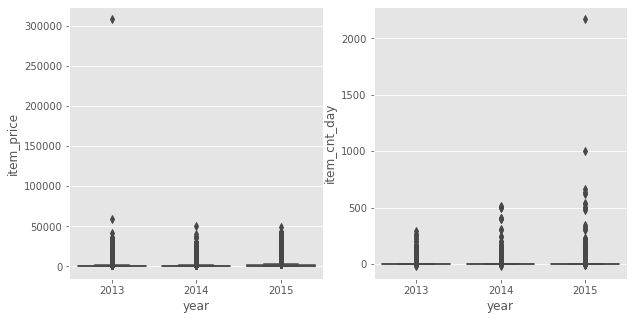

In [20]:
ig, ax = plt.subplots(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x = sales_train["year"], y = sales_train["item_price"])
plt.subplot(122)
sns.boxplot(x = sales_train["year"], y = sales_train["item_cnt_day"])
plt.show()

In [21]:
sales_train[sales_train.item_cnt_day > 900]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
2326930,2015-01-15,24,12,20949,4.000000,1000.0,2015
2909818,2015-10-28,33,12,11373,0.908714,2169.0,2015


In [22]:
items[items.item_id == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [23]:
shops[shops.shop_id == 12]

,shop_name,shop_id
12,Интернет-магазин ЧС,12


In [24]:
item_categories[item_categories.item_category_id == 9]

,item_category_name,item_category_id
9,Доставка товара,9


In [25]:
sales_train[sales_train.item_price > 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
1163158,2013-12-13,11,12,6066,307980.0,1.0,2013


In [26]:
items[items.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [27]:
items[items.item_id == 75]

,item_name,item_id,item_category_id
75,12 ДРУЗЕЙ ОУШЕНА WB (регион),75,40


In [28]:
item_categories[item_categories.item_category_id == 40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [29]:
shops[shops.shop_id == 12]

,shop_name,shop_id
12,Интернет-магазин ЧС,12


The outliers have been normal sales practice.

**Basic plots for monthly sales**

In [30]:
sales_train["year"] = pd.DatetimeIndex(sales_train['date']).year
sales_train["month"] = pd.DatetimeIndex(sales_train['date']).month
sales_train["revenue"] = sales_train.item_price * sales_train.item_cnt_day

In [31]:
sales_date = sales_train.groupby("date_block_num",as_index=False).sum().\
drop(columns = ["shop_id","item_id","year","month","item_price"]).\
rename(columns = {"item_cnt_day":"monthly_sales"})

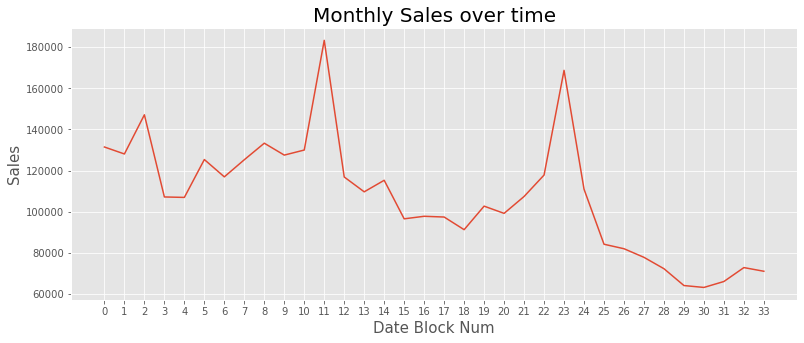

In [32]:
fig, ax = plt.subplots(figsize=(13,5))

plt.plot(sales_date.date_block_num, sales_date.monthly_sales)
plt.xticks(sales_date.date_block_num)
plt.xlabel("Date Block Num", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title("Monthly Sales over time", fontsize = 20)
# plt.legend()
plt.show()

Because we want to predict the number of products sold every month, first we check the relationship between the monthly sales and the year.

In [33]:
sales_train["year"].unique()

array([2013, 2014, 2015])

In [34]:
sales_year = sales_train.groupby("year",as_index=False).sum().\
drop(columns = ["date_block_num","shop_id","item_id", "item_price","month"]).\
rename(columns = {"item_cnt_day" : "yearly_sales"})
sales_year["year"] = sales_year.year.astype("str")

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


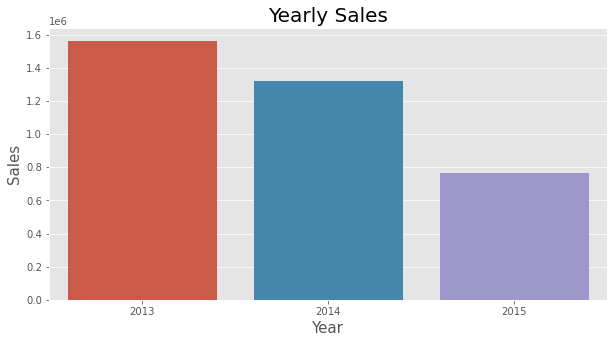

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(sales_year.year, sales_year["yearly_sales"])
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title("Yearly Sales", fontsize = 20)
plt.show()

In [36]:
sales_month = sales_train.groupby(["year","month"], as_index=False).sum().\
drop(columns = ["date_block_num","shop_id","item_id","item_price"]).\
rename(columns = {"item_cnt_day" : "monthly_sales"})
sales_13 = sales_month[sales_month.year == 2013]
sales_14 = sales_month[sales_month.year == 2014]
sales_15 = sales_month[sales_month.year == 2015]

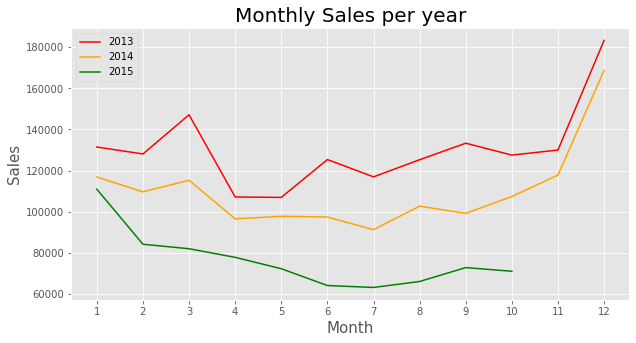

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks([i for i in range(1,13)])
plt.plot(sales_13.month,sales_13.monthly_sales, label = "2013", color = "red")
plt.plot(sales_14.month,sales_14.monthly_sales, label = "2014", color = "orange")
plt.plot(sales_15.month,sales_15.monthly_sales, label = "2015", color = "green")
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title("Monthly Sales per year", fontsize = 20)
plt.legend()

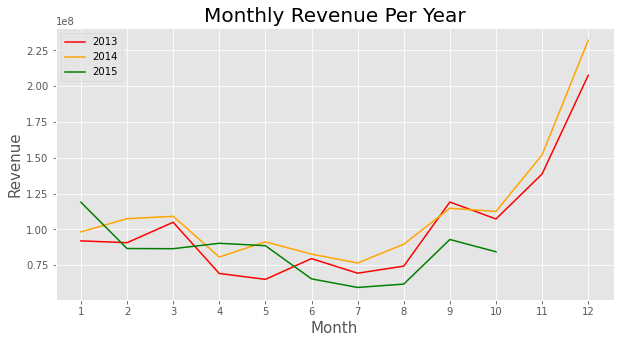

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks([i for i in range(1,13)])
plt.plot(sales_13.month,sales_13.revenue, label = "2013", color = "red")
plt.plot(sales_14.month,sales_14.revenue, label = "2014", color = "orange")
plt.plot(sales_15.month,sales_15.revenue, label = "2015", color = "green")
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)
plt.title("Monthly Revenue Per Year", fontsize =20)
plt.legend()

In [39]:
sales_shop = sales_train.groupby("shop_id", as_index=False).sum().\
drop(columns = ["date_block_num","item_id","item_price","year","month"]).\
rename(columns={"item_cnt_day": "total_sales"})
sales_shop["shop_id"] = sales_shop.shop_id.astype(str)
print("The mean of total sales for every shop:",sales_shop["total_sales"].mean())
print("The mean of total revenues for every shop:",sales_shop["revenue"].mean())

The mean of total sales for every shop: 60803.433333333334
The mean of total revenues for every shop: 56648772.40949973


In [40]:
sales_shop.total_sales.describe()

count        60.000000
mean      60803.433333
std       57992.901750
min         330.000000
25%       23333.000000
50%       50176.000000
75%       69562.250000
max      310777.000000
Name: total_sales, dtype: float64

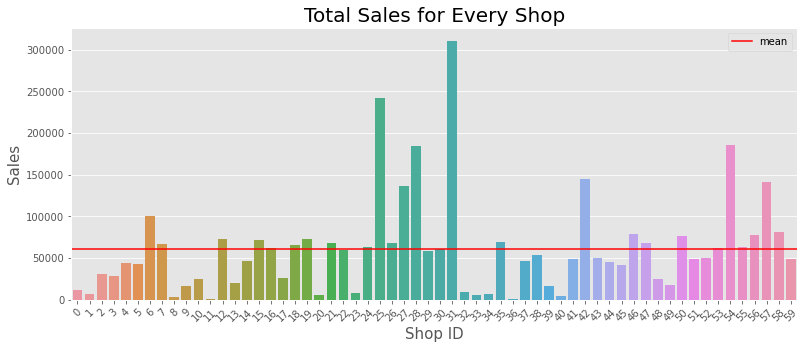

In [41]:
fig, ax = plt.subplots(figsize=(13,5))
sns.barplot(data=sales_shop, x="shop_id", y="total_sales")
plt.xticks(range(60),rotation=45)
plt.axhline(60803, label = "mean", color = "red")
plt.xlabel("Shop ID", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title("Total Sales for Every Shop", fontsize = 20)
plt.legend()
plt.show()

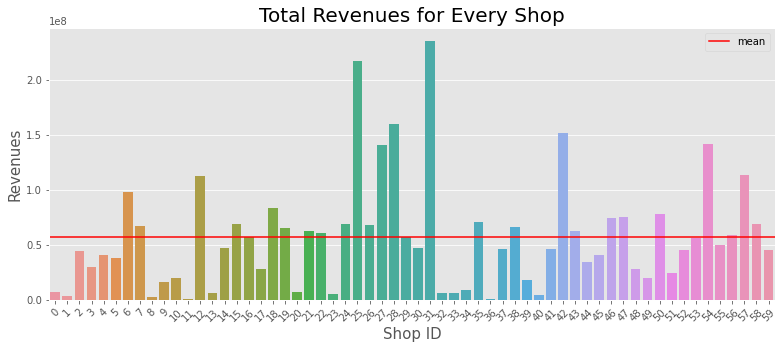

In [42]:
fig, ax = plt.subplots(figsize=(13,5))
sns.barplot(data=sales_shop, x="shop_id", y="revenue")
plt.xticks(range(60),rotation=45)
plt.axhline(56648772, label = "mean", color = "red")
plt.xlabel("Shop ID", fontsize = 15)
plt.ylabel("Revenues", fontsize = 15)
plt.title("Total Revenues for Every Shop", fontsize = 20)
plt.legend()
plt.show()

**Trend and Seasonality**

In [44]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as Scientist

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from itertools import product
from tqdm import tqdm_notebook

In [51]:
def tsplot(y, lags=None, figsize=(12,7),style="bmh"):

  with plt.style.context(style):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))

    y.plot(ax = ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title("Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}".format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

@article{tsa,
  title={A basic time series forecasting course with Python},
  author={Zemkoho, Alain},
  journal={arXiv preprint arXiv:2205.10941},
  year={2022}
}

The tsplot function is from the tutorial.

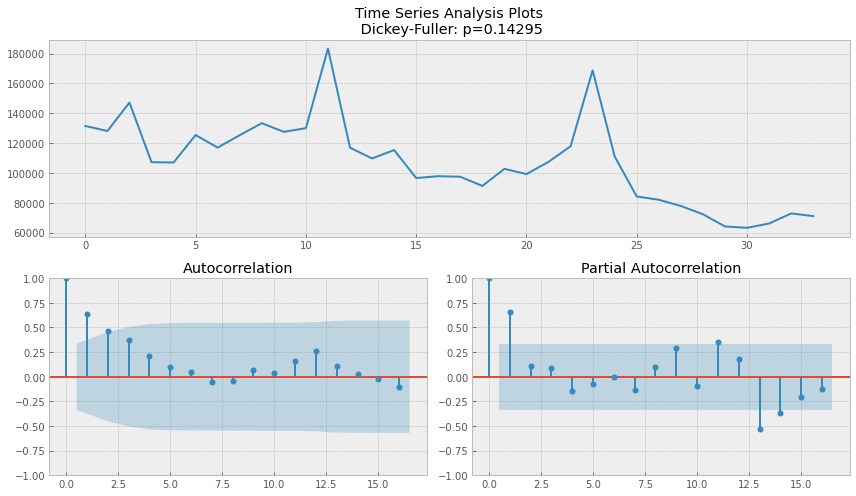

In [46]:
sales = sales_date.drop(columns = "revenue")
tsplot(sales.monthly_sales)

The initial p-value is 0.14 for the stationary check, larger than 0.05, namely that the initial monthly sales are not stationary. It fits with our previous data exploration -- monthly sales decreased and there was a peak sales on December.

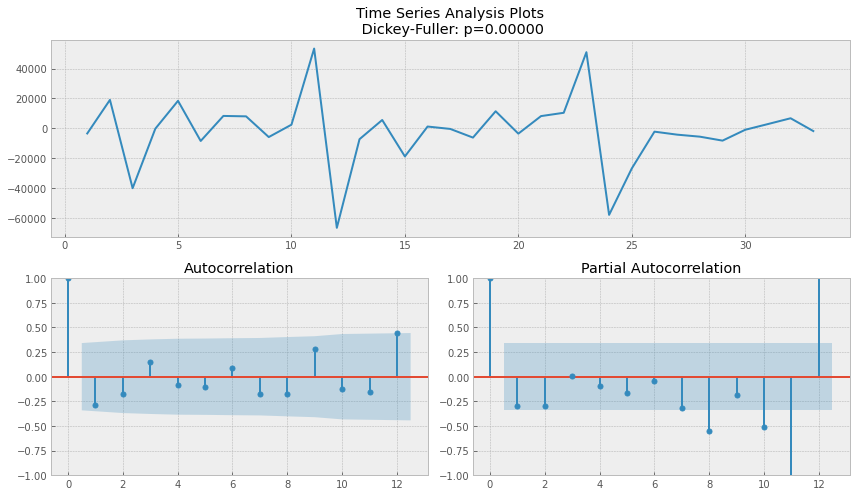

In [47]:
sales["diff1"] = sales["monthly_sales"].diff()
sales_train = sales.dropna()
tsplot(sales_train.diff1, lags=12)

After first differencing to remove the trend, the p-value is significantly less than 0, meaning that monthly sales are stationary after first differencing. But we can still observe seasonal from ACF plot and PACF plot.

In [48]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [49]:
from pmdarima import auto_arima
smodel = auto_arima(sales.monthly_sales,start_p=0,start_q=0,
                    max_p=2,max_q=2,max_d=2,
                    seasonal=True,m=12,
                    start_P=0,start_Q=0,max_P=3,max_Q=3,
                    max_D=2,information_criterion="aic",test="adf",
                    trace=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=186.570, Time=0.91 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=185.655, Time=0.17 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=184.653, Time=0.06 sec
 ARIMA(0,2,1)(0,2,0)[12]             : AIC=183.525, Time=0.03 sec
 ARIMA(0,2,1)(1,2,0)[12]             : AIC=184.714, Time=0.07 sec
 ARIMA(0,2,1)(1,2,1)[12]             : AIC=186.648, Time=0.11 sec
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,2,2)(0,2,0)[12]             : AIC=nan, Time=0.06 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=187.435, Time=0.05 sec
 ARIMA(1,2,2)(0,2,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,2,1)(0,2,0)[12] intercept   : AIC=189.089, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,2,0)[12]          
Total fit time: 1.765 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   34
Model:             SARIMAX(0, 2, 1)x(0, 2, [], 12)   Log Likelihood                 -89.762
Date:                             Fri, 09 Dec 2022   AIC                            183.525
Time:                                     23:04:13   BIC                            183.684
Sample:                                          0   HQIC                           182.453
                                              - 34                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9741      0.478     -2.040      0.041      -1.910      -0.038
sigma2      6.489e+08   9.67e-11   6.71e+18      0.000    6.49e+08    6.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.84   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.05   Prob(JB):                         0.91
Heteroskedasticity (H):               7.07   Skew:                             0.05
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Using SARIMA model to fit the relationship between time and monthly sales, the best model is SARIMA(0,2,1)(0,2,0)[12], i.e., the traditional time serious model's preditions become better after including the trend and seasonality.